In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt, seaborn as sb 

In [4]:
df = pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:

df["bmi"].fillna(28.893237,inplace=True)


In [9]:
df["ever_married"].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<AxesSubplot:xlabel='bmi'>

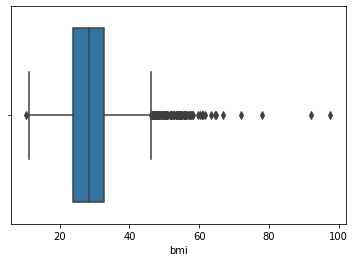

In [12]:
sb.boxplot(x=df["bmi"])


<AxesSubplot:xlabel='avg_glucose_level'>

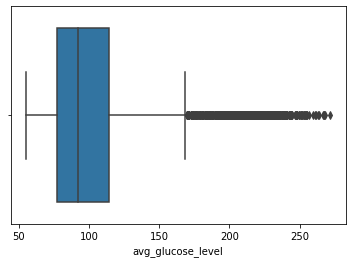

In [13]:
sb.boxplot(df["avg_glucose_level"])


In [14]:
df["avg_glucose_level"].values

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [15]:
q1 = df["bmi"].quantile(0.25)
q3 = df["bmi"].quantile(0.75)
q1,q3

(23.8, 32.8)

In [16]:
iqr = q3-q1
iqr

8.999999999999996

In [17]:
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
upper_limit

46.29999999999999

In [18]:
df = df[(df["bmi"] >= lower_limit) & (df["bmi"] <= upper_limit)]


In [19]:
df.shape

(4984, 12)

In [20]:
q1 = df["avg_glucose_level"].quantile(0.25)
q3 = df["avg_glucose_level"].quantile(0.75)
q1,q3

(77.1975, 113.755)

In [21]:
iqr=q3-q1
iqr

36.55749999999999

In [22]:
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
upper_limit

168.59124999999997

In [23]:
df = df[(df["avg_glucose_level"] >= lower_limit) & (df["avg_glucose_level"] <= upper_limit)]

In [24]:
df.shape

(4390, 12)

In [25]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4390 entries, 2 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4390 non-null   int64  
 1   gender             4390 non-null   object 
 2   age                4390 non-null   float64
 3   hypertension       4390 non-null   int64  
 4   heart_disease      4390 non-null   int64  
 5   ever_married       4390 non-null   object 
 6   work_type          4390 non-null   object 
 7   Residence_type     4390 non-null   object 
 8   avg_glucose_level  4390 non-null   float64
 9   bmi                4390 non-null   float64
 10  smoking_status     4390 non-null   object 
 11  stroke             4390 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 445.9+ KB


In [27]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()


In [28]:
dummies = pd.get_dummies(df["gender"])
dummies

,Female,Male,Other
2,0,1,0
6,0,1,0
7,1,0,0
8,1,0,0
9,1,0,0
...,...,...,...
5105,1,0,0
5106,1,0,0
5107,1,0,0
5108,0,1,0


In [29]:
df=pd.concat([df,dummies],axis=1)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0,1,0
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1,0,1,0
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1,1,0,0
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1,1,0,0
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,1,0,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,1,0,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,1,0,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,0,1,0


In [30]:
df.drop(["gender","Other","id"],axis=1,inplace=True)
df

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male
2,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0,1
6,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1,0,1
7,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1,1,0
8,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1,1,0
9,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,1,0
5106,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,1,0
5107,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,1,0
5108,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,0,1


In [31]:
dummies = pd.get_dummies(df["ever_married"])
dummies

,No,Yes
2,0,1
6,0,1
7,1,0
8,0,1
9,0,1
...,...,...
5105,0,1
5106,0,1
5107,0,1
5108,0,1


In [32]:
df=pd.concat([df,dummies],axis=1)
df

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,No,Yes
2,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0,1,0,1
6,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1,0,1,0,1
7,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1,1,0,1,0
8,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1,1,0,0,1
9,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,1,0,0,1
5106,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,1,0,0,1
5107,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,1,0,0,1
5108,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,0,1,0,1


In [33]:
df.drop(["ever_married","No"],axis=1,inplace=True)
df

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Yes
2,80.0,0,1,Private,Rural,105.92,32.500000,never smoked,1,0,1,1
6,74.0,1,1,Private,Rural,70.09,27.400000,never smoked,1,0,1,1
7,69.0,0,0,Private,Urban,94.39,22.800000,never smoked,1,1,0,0
8,59.0,0,0,Private,Rural,76.15,28.893237,Unknown,1,1,0,1
9,78.0,0,0,Private,Urban,58.57,24.200000,Unknown,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,Private,Urban,83.75,28.893237,never smoked,0,1,0,1
5106,81.0,0,0,Self-employed,Urban,125.20,40.000000,never smoked,0,1,0,1
5107,35.0,0,0,Self-employed,Rural,82.99,30.600000,never smoked,0,1,0,1
5108,51.0,0,0,Private,Rural,166.29,25.600000,formerly smoked,0,0,1,1


In [34]:
dummies = pd.get_dummies(df["work_type"])
dummies

,Govt_job,Never_worked,Private,Self-employed,children
2,0,0,1,0,0
6,0,0,1,0,0
7,0,0,1,0,0
8,0,0,1,0,0
9,0,0,1,0,0
...,...,...,...,...,...
5105,0,0,1,0,0
5106,0,0,0,1,0
5107,0,0,0,1,0
5108,0,0,1,0,0


In [35]:
df=pd.concat([df,dummies],axis=1)
df

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Yes,Govt_job,Never_worked,Private,Self-employed,children
2,80.0,0,1,Private,Rural,105.92,32.500000,never smoked,1,0,1,1,0,0,1,0,0
6,74.0,1,1,Private,Rural,70.09,27.400000,never smoked,1,0,1,1,0,0,1,0,0
7,69.0,0,0,Private,Urban,94.39,22.800000,never smoked,1,1,0,0,0,0,1,0,0
8,59.0,0,0,Private,Rural,76.15,28.893237,Unknown,1,1,0,1,0,0,1,0,0
9,78.0,0,0,Private,Urban,58.57,24.200000,Unknown,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,Private,Urban,83.75,28.893237,never smoked,0,1,0,1,0,0,1,0,0
5106,81.0,0,0,Self-employed,Urban,125.20,40.000000,never smoked,0,1,0,1,0,0,0,1,0
5107,35.0,0,0,Self-employed,Rural,82.99,30.600000,never smoked,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,Private,Rural,166.29,25.600000,formerly smoked,0,0,1,1,0,0,1,0,0


In [36]:
df.drop(["work_type","children"],axis=1,inplace=True)
df

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Yes,Govt_job,Never_worked,Private,Self-employed
2,80.0,0,1,Rural,105.92,32.500000,never smoked,1,0,1,1,0,0,1,0
6,74.0,1,1,Rural,70.09,27.400000,never smoked,1,0,1,1,0,0,1,0
7,69.0,0,0,Urban,94.39,22.800000,never smoked,1,1,0,0,0,0,1,0
8,59.0,0,0,Rural,76.15,28.893237,Unknown,1,1,0,1,0,0,1,0
9,78.0,0,0,Urban,58.57,24.200000,Unknown,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,Urban,83.75,28.893237,never smoked,0,1,0,1,0,0,1,0
5106,81.0,0,0,Urban,125.20,40.000000,never smoked,0,1,0,1,0,0,0,1
5107,35.0,0,0,Rural,82.99,30.600000,never smoked,0,1,0,1,0,0,0,1
5108,51.0,0,0,Rural,166.29,25.600000,formerly smoked,0,0,1,1,0,0,1,0


In [37]:
dummies = pd.get_dummies(df["Residence_type"])
dummies

,Rural,Urban
2,1,0
6,1,0
7,0,1
8,1,0
9,0,1
...,...,...
5105,0,1
5106,0,1
5107,1,0
5108,1,0


In [38]:
df=pd.concat([df,dummies],axis=1)
df

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Yes,Govt_job,Never_worked,Private,Self-employed,Rural,Urban
2,80.0,0,1,Rural,105.92,32.500000,never smoked,1,0,1,1,0,0,1,0,1,0
6,74.0,1,1,Rural,70.09,27.400000,never smoked,1,0,1,1,0,0,1,0,1,0
7,69.0,0,0,Urban,94.39,22.800000,never smoked,1,1,0,0,0,0,1,0,0,1
8,59.0,0,0,Rural,76.15,28.893237,Unknown,1,1,0,1,0,0,1,0,1,0
9,78.0,0,0,Urban,58.57,24.200000,Unknown,1,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,Urban,83.75,28.893237,never smoked,0,1,0,1,0,0,1,0,0,1
5106,81.0,0,0,Urban,125.20,40.000000,never smoked,0,1,0,1,0,0,0,1,0,1
5107,35.0,0,0,Rural,82.99,30.600000,never smoked,0,1,0,1,0,0,0,1,1,0
5108,51.0,0,0,Rural,166.29,25.600000,formerly smoked,0,0,1,1,0,0,1,0,1,0


In [39]:
df.drop(["Residence_type","Rural"],axis=1,inplace=True)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Yes,Govt_job,Never_worked,Private,Self-employed,Urban
2,80.0,0,1,105.92,32.500000,never smoked,1,0,1,1,0,0,1,0,0
6,74.0,1,1,70.09,27.400000,never smoked,1,0,1,1,0,0,1,0,0
7,69.0,0,0,94.39,22.800000,never smoked,1,1,0,0,0,0,1,0,1
8,59.0,0,0,76.15,28.893237,Unknown,1,1,0,1,0,0,1,0,0
9,78.0,0,0,58.57,24.200000,Unknown,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,never smoked,0,1,0,1,0,0,1,0,1
5106,81.0,0,0,125.20,40.000000,never smoked,0,1,0,1,0,0,0,1,1
5107,35.0,0,0,82.99,30.600000,never smoked,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,formerly smoked,0,0,1,1,0,0,1,0,0


In [40]:
dummies = pd.get_dummies(df["smoking_status"])
dummies

,Unknown,formerly smoked,never smoked,smokes
2,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,1,0,0,0
9,1,0,0,0
...,...,...,...,...
5105,0,0,1,0
5106,0,0,1,0
5107,0,0,1,0
5108,0,1,0,0


In [41]:
df=pd.concat([df,dummies],axis=1)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Yes,Govt_job,Never_worked,Private,Self-employed,Urban,Unknown,formerly smoked,never smoked,smokes
2,80.0,0,1,105.92,32.500000,never smoked,1,0,1,1,0,0,1,0,0,0,0,1,0
6,74.0,1,1,70.09,27.400000,never smoked,1,0,1,1,0,0,1,0,0,0,0,1,0
7,69.0,0,0,94.39,22.800000,never smoked,1,1,0,0,0,0,1,0,1,0,0,1,0
8,59.0,0,0,76.15,28.893237,Unknown,1,1,0,1,0,0,1,0,0,1,0,0,0
9,78.0,0,0,58.57,24.200000,Unknown,1,1,0,1,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,never smoked,0,1,0,1,0,0,1,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.000000,never smoked,0,1,0,1,0,0,0,1,1,0,0,1,0
5107,35.0,0,0,82.99,30.600000,never smoked,0,1,0,1,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,formerly smoked,0,0,1,1,0,0,1,0,0,0,1,0,0


In [42]:
df.drop(["smoking_status","Unknown"],axis=1,inplace=True)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Yes,Govt_job,Never_worked,Private,Self-employed,Urban,formerly smoked,never smoked,smokes
2,80.0,0,1,105.92,32.500000,1,0,1,1,0,0,1,0,0,0,1,0
6,74.0,1,1,70.09,27.400000,1,0,1,1,0,0,1,0,0,0,1,0
7,69.0,0,0,94.39,22.800000,1,1,0,0,0,0,1,0,1,0,1,0
8,59.0,0,0,76.15,28.893237,1,1,0,1,0,0,1,0,0,0,0,0
9,78.0,0,0,58.57,24.200000,1,1,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,1,0,1,0,0,1,0,1,0,1,0
5106,81.0,0,0,125.20,40.000000,0,1,0,1,0,0,0,1,1,0,1,0
5107,35.0,0,0,82.99,30.600000,0,1,0,1,0,0,0,1,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,0,1,1,0,0,1,0,0,1,0,0


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [44]:
num_vars = ["avg_glucose_level","bmi","age"]

df[num_vars] = scaler.fit_transform(df[num_vars])

In [45]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Yes,Govt_job,Never_worked,Private,Self-employed,Urban,formerly smoked,never smoked,smokes
2,0.975586,0,1,0.449438,0.607450,1,0,1,1,0,0,1,0,0,0,1,0
6,0.902344,1,1,0.132443,0.461318,1,0,1,1,0,0,1,0,0,0,1,0
7,0.841309,0,0,0.347430,0.329513,1,1,0,0,0,0,1,0,1,0,1,0
8,0.719238,0,0,0.186057,0.504104,1,1,0,1,0,0,1,0,0,0,0,0
9,0.951172,0,0,0.030523,0.369628,1,1,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.975586,1,0,0.253296,0.504104,0,1,0,1,0,0,1,0,1,0,1,0
5106,0.987793,0,0,0.620012,0.822350,0,1,0,1,0,0,0,1,1,0,1,0
5107,0.426270,0,0,0.246572,0.553009,0,1,0,1,0,0,0,1,0,0,1,0
5108,0.621582,0,0,0.983544,0.409742,0,0,1,1,0,0,1,0,0,1,0,0


In [46]:
x = df.drop("heart_disease",axis=1)
y = df["heart_disease"]

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state = 100)


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [49]:
model_param = {"DesicionTreeClassifier":{"model": DecisionTreeClassifier(),"param":{"criterion":["gini","entropy"]}},
               "KNeighborsClassifier":{"model":KNeighborsClassifier(),"param":{"n_neighbors":[5,10,15,20,25]}},
               "SVC":{"model":SVC(),"param":{"kernel":["rbf","linear","sigmoid"],"C":[0.1,1,10,100]}},
               "LogisticRegression":{"model":LogisticRegression(),"param":{"random_state" : [0,10,15],"solver" : ["liblinear","lbfgs"],"multi_class":["ovr","multinomial","auto"],"C":[1,5,10]}}
}

In [50]:
scores=[]
for model_name,  mp in model_param.items():
        model_selection =  GridSearchCV(mp['model'],mp['param'], cv=5, return_train_score=False)
        model_selection.fit(x_train,y_train)
        scores.append({
            'model': model_name,
            'best_score': model_selection.best_score_,
            'best_params': model_selection.best_params_
        })

In [51]:
df2 = pd.DataFrame(scores,columns=["model","best_score","best_params"])
df2.head()

,model,best_score,best_params
0,DesicionTreeClassifier,0.937731,{'criterion': 'entropy'}
1,KNeighborsClassifier,0.964314,{'n_neighbors': 5}
2,SVC,0.963175,"{'C': 10, 'kernel': 'rbf'}"
3,LogisticRegression,0.963935,"{'C': 5, 'multi_class': 'multinomial', 'random..."


In [52]:
model_clf=LogisticRegression(C=1,multi_class="ovr",random_state=10)
model_clf.fit(x_train,y_train)

LogisticRegression(C=1, multi_class='ovr', random_state=10)

In [53]:
model_clf.score(x_train,y_train)

0.9627942293090357

In [54]:
y_predicted=model_clf.predict(x_test)

In [55]:
model_clf.score(x_test,y_test)

0.9584282460136674

In [56]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[1682,    0],
       [  73,    1]])

<AxesSubplot:>

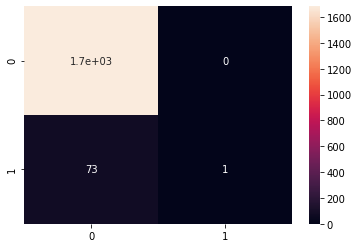

In [57]:
sb.heatmap(cm,annot=True)

In [58]:
model_svc = SVC(C=0.1,kernel = "rbf")
model_svc.fit(x_train,y_train)

SVC(C=0.1)

In [59]:
y_predicted=model_svc.predict(x_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
model_svc.score(x_train,y_train)

0.9627942293090357

In [61]:
model_svc.score(x_test,y_test)

0.9578587699316629

In [62]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[1682,    0],
       [  74,    0]])

<AxesSubplot:>

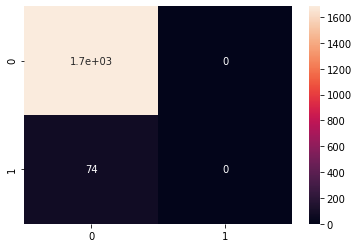

In [63]:
sb.heatmap(cm,annot=True)

In [64]:
model_tree = DecisionTreeClassifier(criterion="entropy")
model_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [65]:
y_predicted=model_tree.predict(x_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)

0.9253986332574032

In [67]:
model_tree.score(x_test,y_test)

0.9253986332574032

In [68]:
model_tree.score(x_train,y_train)

1.0

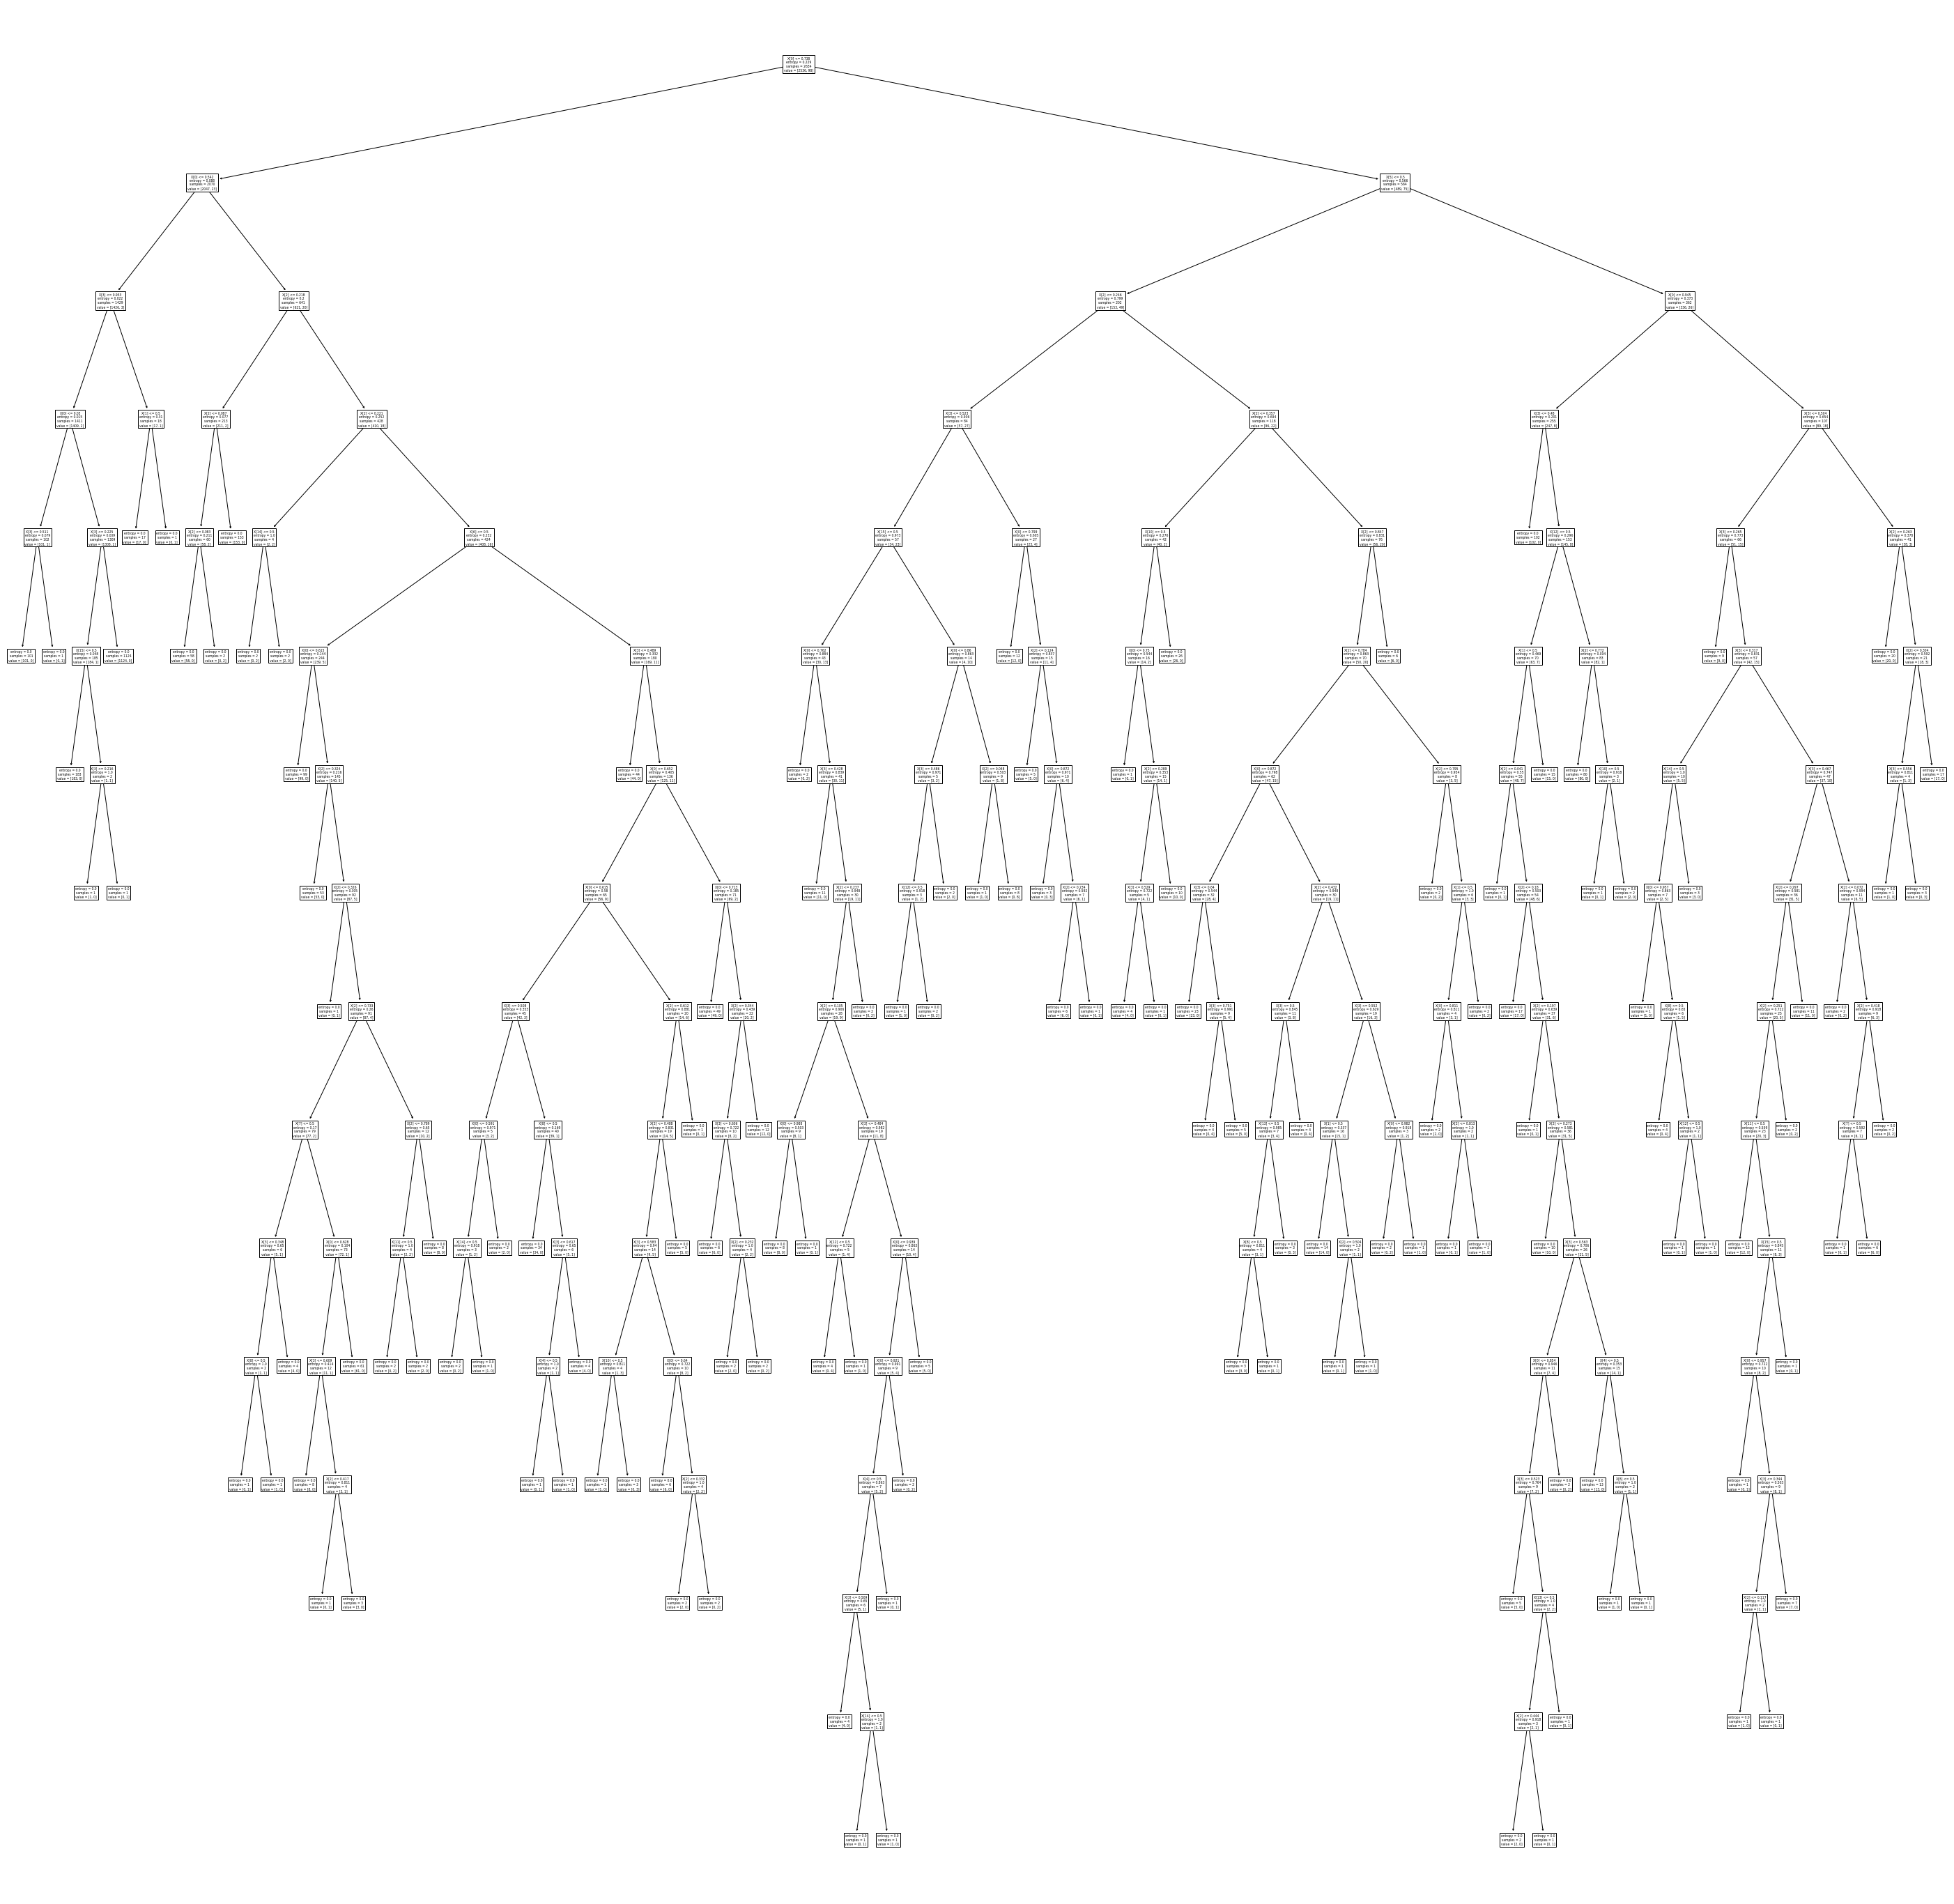

In [69]:
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(model_tree.fit(x_train,y_train))
plt.show()

In [70]:
cm=confusion_matrix(y_test,y_predicted)
cm

array([[1611,   71],
       [  60,   14]])

<AxesSubplot:>

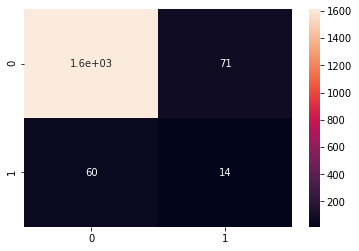

In [71]:
sb.heatmap(cm,annot=True)

In [72]:
from sklearn.metrics import classification_report

classification_report(y_test,y_predicted)


'              precision    recall  f1-score   support\n\n           0       0.96      0.96      0.96      1682\n           1       0.16      0.19      0.18        74\n\n    accuracy                           0.93      1756\n   macro avg       0.56      0.57      0.57      1756\nweighted avg       0.93      0.93      0.93      1756\n'